In [1]:
import warnings
warnings.filterwarnings('ignore')
from astropy.io import fits
import os
from astropy.table import join

import sys
sys.path.append('../')
from modules import dendro_misc


In [82]:
# Define names and filenames...

galaxy = 'ngc0628'
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'
cutout_dir = './analysis/cutouts'
dendro_dir = './analysis/dendro'
cutouts_hdus_dir = './analysis/cutouts_hdus/'
rerun_masking = False

regions_file = '%s/sample.reg' %cutout_dir
regions_pickel_file = '%s/sample.pickel' %cutout_dir
sample_table_file = '%s/data_misc/sample_table/phangs_sample_table_v1p6.fits' %root_dir
muscat_table_file = '%s/data_misc/nebulae_catalogue/Nebulae_catalogue_v3.fits' %root_dir

muscat_table = dendro_misc.get_museprops(galaxy, muscat_table_file)
props_all_muscat_table = dendro_misc.load_pickle('%s/props_all.pickel' %dendro_dir)  

[INFO] [get_MuseProps] Getting MUSE catalouge properties for ngc0628...
[INFO] [load_pickle] Load ./analysis/dendro/props_all.pickel


In [86]:
muscat_table['region_ID'][np.isnan(muscat_table['region_ID'])]

<Column name='region_ID' dtype='float64' length=0>

In [59]:
props_all_muscat_table['HA6562_FLUX_HST']/props_all_muscat_table['HA6562_FLUX']

--
--
0.974941131271274
0.6950336092515657
0.901315742634657
0.7732969934558841
0.8145327612973811
0.8814697310886734
--
0.9295514538458917
0.7855921640818027


In [6]:
# Load cutout hdus with smoothed, masked, and non-masked data...

cutout_dir = './analysis/dendro'
hdus_file = '%s/hdus_all_withmasked_withdendro.pickel' %cutout_dir
rerun_masking = False

hdus = dendro_misc.load_pickle(hdus_file)

[INFO] [load_pickle] Load ./analysis/dendro/hdus_all_withmasked_withdendro.pickel


In [9]:
hdus[hdus.keys()[0]]

dict_keys(['hstha_hdu', 'musha_hdu', 'muscat_hdu', 'hstha_hdu_smooth', 'hstha_hdu_smooth_masked', 'hstha_hdu_smooth_masked_ones', 'hstha_hdu_smooth_maskedall', 'musmask_hdu', 'indexmap_trunk_hdu', 'indexmap_trunk_close_hdu'])

In [91]:
import numpy as np
from tqdm.auto import tqdm

def get_hdulists(hdus, regionIDs, outputdir='./'):

    keys = list(hdus.keys())
    # for i in tqdm(range(len(hdus[keys[0]]))): 
    for i in [1272]: 
        
        regionID = regionIDs[i]
        data = []
        header = []
        hdu = []

        for key in keys:
            data = np.array(hdus[key][i].data)
            header = hdus[key][i].header
            if key == keys[0]: 
                hdu += [fits.PrimaryHDU((), header=header)]
                hdu += [fits.ImageHDU(data, header, key)]
            else: 
                hdu += [fits.ImageHDU(data, header, key)]
        
        hdu_list = fits.HDUList(hdu)
        hdu_list.writeto('%s/hdus_%i.fits' %(outputdir, regionID), overwrite=True)

cutouts_hdus_dir = './analysis/cutouts_hdus/'
get_hdulists(hdus, props_all_muscat_table['region_ID'], outputdir=cutouts_hdus_dir)

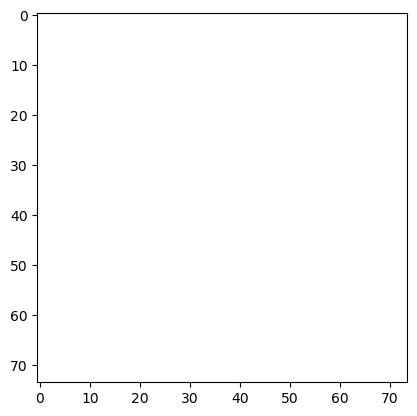

In [106]:
import matplotlib.pyplot as plt

# plt.imshow(hdus['hstha_hdu_smooth_masked'][1723].data)
plt.imshow(hdus['hstha_hdu_smooth_masked'][1272].data)
# plt.imshow(hdus['hstha_hdu_smooth_maskedall'][1723].data)